In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import lxml.html as lh

In [2]:
pages=[]
for i in range(1,33):
    pages.append('https://www.flipkart.com/refrigerators/pr?sid=j9e%2Cabm%2Chzg&page={}'.format(i))

In [3]:
req=[]
for i in pages:
    req.append(requests.get(i))

In [4]:
soup=[]
for i in req:
    soup.append(BeautifulSoup(i.text))

In [5]:
name=[]
for i in soup:
    cell=i.find_all('div',class_='_1UoZlX')
    for i in cell:
        x=(i.find_all('div',class_="_3wU53n"))
        if len(i)==1:
            y=x[0].text.strip()
            name.append(y)
        elif len(i)==0:
            name.append(np.nan)
len(name)            

480

In [6]:
a=[]
door=[]
for i in name:
    a.append(i)
for i in a:
    if len(i)>=2:
        door.append(' '.join(i.split()[5:7]))
    if len(i)==0:
        door.append(np.nan)
len(door)        

480

In [7]:
a=[]
variant=[]
for i in name:
    x=re.findall(r'L.(\w+\s\w+)',i)
    a.append(x)         ##we got in list now we have to remove from list and should append nan if we have missing value.
for i in a:      
    if len(i)==1:
        variant.append(i[0])
    if len(i)==0:
        variant.append(np.nan)
len(variant) 

480

In [8]:
product=[]
for i in name:
            product.append(i.split(' ')[0])
len(product)                 

480

In [9]:
litres=[]
for i in name:
    if len(i)>=1:
        x=re.findall(r'\d+',i)[0]
        litres.append(x)
    elif len(i)==0:
        litres.append(np.nan)
len(litres)    

480

In [10]:
a=[]
year=[]
for i in name:
    x=re.findall(r'\d{4}',i)
    a.append(x)         ##we got in list now we have to remove from list and should append nan if we have missing value.
for i in a:      
    if len(i)==1:
        year.append(i[0])
    if len(i)==0:
        year.append(np.nan)
len(year)       

480

In [11]:
a=[]
star=[]
for i in name:
        x=re.findall(r'\s\d\s',i)
        a.append(x)         ##we got in list now we have to remove from list and should append nan if we have missing value.
for i in a:      
    if len(i)==1:
        star.append(i[0])
    if len(i)==0:
        star.append(np.nan)
len(star)        

480

In [12]:
price=[]
for i in soup:
    cell=i.find_all('div',class_='_1UoZlX')
    for i in cell:
        x=(i.find_all('div',class_="_1vC4OE _2rQ-NK"))
        if len(i)==1:
            y=x[0].text.strip()
            price.append(y[1:])
        elif len(i)==0:
            price.append(np.nan)

In [13]:
len(price)

480

In [14]:
a=[]
mrp=[]
for i in soup:
    cell=i.find_all('div',class_='_1UoZlX')
    for i in cell:
        x=(i.find_all('div',class_="_3auQ3N _2GcJzG"))
        a.append(x)
for i in a:
    if len(i)==0:
        mrp.append(np.nan)
    elif len(i)>=1:
         mrp.append(i[0].text[1:])                
len(mrp)       

480

In [15]:
des=[]
for i in soup:
    cell=i.find_all('div',class_='_1UoZlX')
    for i in cell:
        x=(i.find_all('ul',class_="vFw0gD"))
        if len(i)==1:
            y=x[0].text.strip()
            des.append(y)
        elif len(i)==0:
            des.append(np.nan) 
len(des)            

480

In [16]:
a=[]
energy=[]
for i in des:
        x=re.findall('\d+.[%]',i)
        a.append(x)
for i in a:
    if len(i)>=1:
        energy.append(i[0])
    elif len(i)==0:
        energy.append(np.nan)
len(energy)        

480

In [17]:
a=[]
warant=[]
b=[]
for i in des:
        x=re.findall(r'1.\w[Y-y]',i)
        a.append(x)
for i in a:    
    if len(i)>=1:
        warant.append(i[0])
    if len(i)==0:
        warant.append(np.nan)    
len(warant)        

480

In [18]:
comp=[]
for i in des:
    if len(i)>=1:
        a=re.findall(r'^\w+',i)
        comp.append(a[0])  
    elif len(i)==0:
        comp.append(np.nan)      
len(comp)     

480

In [19]:
a=[]
comp_warant=[]
for i in des:
        x=re.findall(r'and.(\d+)',i)
        a.append(x)  
for i in a:
    if len(i)>=1:
        comp_warant.append(i[0])
    elif len(i)==0:
        comp_warant.append(np.nan)
len(comp_warant)       

480

In [20]:
discount=[]
for i in soup:
    cell=i.find_all('div',class_='_1UoZlX')
    for i in cell:
        x=(i.find_all('div',class_="_1vC4OE _2rQ-NK"))
        if len(i)==1:
            y=x[0].text.strip()
            res=re.findall(r'(\d+)',y)
            discount.append(res[0])
        elif len(i)==0:
            price.append(np.nan)
len(discount)            

480

In [21]:
a=[]
customer=[]
for i in soup:
        cell=i.find_all('div',class_='_1UoZlX')
        for i in cell:
            x=(i.find_all('div',class_="hGSR34"))
            a.append(x)
for i in a:
    if len(i)==0:
        customer.append(np.nan)
    elif len(i)>=1:
        customer.append(i[0].text)  
len(customer)        

480

In [22]:
df=pd.DataFrame([product,litres,variant,door,comp,comp_warant,year,star,energy,warant,customer,mrp,price,discount]).T

In [23]:
df.columns=['Product_Name','Litres','Variant','Door','Compressor','Comp_Warranty','Year','Ref_Ratings','Energy_Savings(%)','Warranty','Customer_Ratings','Mrp','Offer_Price','Discount(%)']

In [24]:
df

,Product_Name,Litres,Variant,Door,Compressor,Comp_Warranty,Year,Ref_Ratings,Energy_Savings(%),Warranty,Customer_Ratings,Mrp,Offer_Price,Discount(%)
0,Whirlpool,190,Direct Cool,Single Door,Reciprocatory,5,2019,3,35%,1 ye,4.3,"12,660","11,490",11
1,Samsung,192,Direct Cool,Single Door,Digital,10,2019,5,55%,1 Ye,4.5,"20,400","16,290",16
2,Haier,181,Direct Cool,Single Door,Reciprocatory,9,2019,3,35%,1 Ye,4.3,"14,600","10,990",10
3,Haier,195,Direct Cool,Single Door,Reciprocatory,10,2019,5,55%,1 Ye,4.5,"20,687","14,990",14
4,Whirlpool,190,Direct Cool,Single Door,Rotary,5,2019,3,35%,1 ye,4.3,"13,750","11,990",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Samsung,324,NaN,Double Door,Inverter,10,2019,3,35%,1 Ye,4.4,"39,440","35,100",35
476,Mitashi,52,Direct Cool,Single Door,Reciprocatory,5,2019,2,20%,1 Ye,4,"8,250","7,490",7
477,Whirlpool,245,Frost Free,Double Door,Reciprocatory,10,NaN,2,20%,1 Ye,4.3,"24,034","21,000",21
478,LG,190,Direct Cool,Single Door,Smart,10,2019,4,45%,1 Ye,4.4,"18,210","15,740",15


In [25]:
df.dropna(inplace=True)

In [26]:
df=df[['Product_Name','Litres', 'Variant', 'Door', 'Compressor','Year','Ref_Ratings','Energy_Savings(%)','Comp_Warranty',
           'Warranty','Customer_Ratings', 'Mrp', 'Offer_Price', 'Discount(%)']]


In [27]:
df.to_csv('data.csv')

### Data Cleaning:-

In [3]:
refg=pd.read_csv('data.csv')

In [4]:
refg.rename(columns={'Product_Name':'Brand_Name'},inplace=True)

In [5]:
refg.drop(axis=1,labels='Unnamed: 0',inplace=True)

In [6]:
refg['Energy_Savings(%)']=list(map(lambda i:i.strip('%'),refg['Energy_Savings(%)']))
refg['Energy_Savings(%)']

0      35
1      55
2      35
3      55
4      35
       ..
311    35
312    35
313    20
314    20
315    45
Name: Energy_Savings(%), Length: 316, dtype: object

In [7]:
refg['Warranty']=list(map(lambda i:i.strip('Ye').strip('ye'),refg['Warranty']))
refg['Warranty'].unique()

array(['1 '], dtype=object)

In [46]:
refg

,Brand_Name,Litres,Variant,Door,Compressor,Year,Ref_Ratings,Energy_Savings(%),Comp_Warranty,Warranty,Customer_Ratings,Mrp,Offer_Price,Discount(%)
0,Whirlpool,190,Direct Cool,Single Door,Reciprocatory,2019,3,35,5,1,4.3,12660,11490,11
1,Samsung,192,Direct Cool,Single Door,Digital,2019,5,55,10,1,4.5,20400,16290,16
2,Haier,181,Direct Cool,Single Door,Reciprocatory,2019,3,35,9,1,4.3,14600,10990,10
3,Haier,195,Direct Cool,Single Door,Reciprocatory,2019,5,55,10,1,4.5,20687,14990,14
4,Whirlpool,190,Direct Cool,Single Door,Rotary,2019,3,35,5,1,4.3,13750,11990,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,Samsung,253,Frost Free,Double Door,Digital,2019,3,35,10,1,3.4,29990,27000,27
312,Whirlpool,215,Direct Cool,Single Door,Reciprocatory,2019,3,35,10,1,4.2,22100,14980,14
313,Godrej,240,Frost Free,Double Door,Reciprocatory,2019,2,20,10,1,3.1,26150,20950,20
314,Mitashi,52,Direct Cool,Single Door,Reciprocatory,2019,2,20,5,1,4.0,8250,7490,7


### Data Types:-

In [9]:
refg['Brand_Name'].unique()

array(['Whirlpool', 'Samsung', 'Haier', 'LG', 'Godrej', 'Panasonic',
       'MarQ', 'Avoir', 'Mitashi', 'Bosch'], dtype=object)

In [10]:
refg['Litres'].unique()

array([190, 192, 181, 195, 198, 235, 200, 275, 253, 215, 255, 236, 258,
       245, 265, 260, 440, 210, 345, 284, 308, 212, 230, 340, 335, 185,
       394, 188, 360, 305, 252, 330, 324, 437, 196, 180, 100, 205, 420,
       292, 276, 321, 465, 347, 225, 500, 327, 290, 270, 251, 546, 220,
       288, 311, 401, 523, 240, 603, 471, 415, 342,  52, 551, 202, 507,
       599], dtype=int64)

In [11]:
refg['Warranty']=refg['Warranty'].apply(int)
refg['Warranty'].unique()

array([1], dtype=int64)

In [12]:
refg['Variant'].unique()

array(['Direct Cool', 'Frost Free'], dtype=object)

In [13]:
refg['Door']=list(map(lambda i:str(i).replace('Direct Cool',refg['Door'].mode()[0]),refg['Door']))
refg['Door']=list(map(lambda i:str(i).replace('Frost Free',refg['Door'].mode()[0]),refg['Door']))
refg['Door']=list(map(lambda i:str(i).replace('Side by',refg['Door'].mode()[0]),refg['Door']))

In [14]:
refg['Door'].unique()

array(['Single Door', 'Double Door'], dtype=object)

In [15]:
refg['Compressor'].unique()

array(['Reciprocatory', 'Digital', 'Rotary', 'Smart', 'Normal', 'DC',
       'Advanced', 'Reciprocating', 'Inverter', 'Rotary5', 'Rotary4',
       'Intellisense', 'Rotary3', 'Intelligent', 'Reciprocatory3',
       'Inverter4', 'Inverter2', 'Non', 'Vario', 'Rotary2'], dtype=object)

In [16]:
refg['Year'].unique()

array([2019, 2020], dtype=int64)

In [17]:
refg['Ref_Ratings'].unique()

array([3, 5, 4, 2], dtype=int64)

In [18]:
refg['Energy_Savings(%)'].unique()

array(['35', '55', '45', '20'], dtype=object)

In [19]:
refg['Comp_Warranty'].unique()

array([ 5, 10,  9], dtype=int64)

In [20]:
refg['Customer_Ratings'].dtype

dtype('float64')

In [21]:
refg['Mrp']=list(map(lambda i:str(i).replace(',',''),refg['Mrp']))
refg['Mrp']=refg['Mrp'].apply(pd.to_numeric)
refg['Mrp'].dtype

dtype('int64')

In [22]:
refg['Discount(%)'].dtype

dtype('int64')

In [23]:
refg['Offer_Price']=list(map(lambda i:str(i).replace(',',''),refg['Offer_Price']))
refg['Offer_Price']=refg['Offer_Price'].apply(pd.to_numeric)
refg['Offer_Price'].dtype

dtype('int64')

### Handling Missing Data:-

In [24]:
refg.isnull().sum()

Brand_Name           0
Litres               0
Variant              0
Door                 0
Compressor           0
Year                 0
Ref_Ratings          0
Energy_Savings(%)    0
Comp_Warranty        0
Warranty             0
Customer_Ratings     0
Mrp                  0
Offer_Price          0
Discount(%)          0
dtype: int64

There are no Null values

In [25]:
refg

,Brand_Name,Litres,Variant,Door,Compressor,Year,Ref_Ratings,Energy_Savings(%),Comp_Warranty,Warranty,Customer_Ratings,Mrp,Offer_Price,Discount(%)
0,Whirlpool,190,Direct Cool,Single Door,Reciprocatory,2019,3,35,5,1,4.3,12660,11490,11
1,Samsung,192,Direct Cool,Single Door,Digital,2019,5,55,10,1,4.5,20400,16290,16
2,Haier,181,Direct Cool,Single Door,Reciprocatory,2019,3,35,9,1,4.3,14600,10990,10
3,Haier,195,Direct Cool,Single Door,Reciprocatory,2019,5,55,10,1,4.5,20687,14990,14
4,Whirlpool,190,Direct Cool,Single Door,Rotary,2019,3,35,5,1,4.3,13750,11990,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,Samsung,253,Frost Free,Double Door,Digital,2019,3,35,10,1,3.4,29990,27000,27
312,Whirlpool,215,Direct Cool,Single Door,Reciprocatory,2019,3,35,10,1,4.2,22100,14980,14
313,Godrej,240,Frost Free,Double Door,Reciprocatory,2019,2,20,10,1,3.1,26150,20950,20
314,Mitashi,52,Direct Cool,Single Door,Reciprocatory,2019,2,20,5,1,4.0,8250,7490,7


### Requirements:-

In [26]:
###15. which product would you suggest at affordable price and why?
refg[(refg['Ref_Ratings']>=3.5) & (refg['Customer_Ratings']>3.5) & (refg['Offer_Price']<=30000) 
    &((refg['Compressor']=='Smart') | (refg['Compressor']=='Digital'))][['Brand_Name','Litres','Variant','Door','Ref_Ratings','Customer_Ratings','Compressor','Mrp','Offer_Price']].tail(10)

,Brand_Name,Litres,Variant,Door,Ref_Ratings,Customer_Ratings,Compressor,Mrp,Offer_Price
231,LG,190,Direct Cool,Single Door,4,4.4,Smart,17990,15190
233,LG,190,Direct Cool,Single Door,4,4.4,Smart,17690,16690
241,LG,270,Direct Cool,Single Door,4,4.3,Smart,25290,20750
251,LG,215,Direct Cool,Single Door,4,4.1,Smart,20000,17737
258,Samsung,192,Direct Cool,Single Door,5,4.3,Digital,20400,17300
261,LG,190,Direct Cool,Single Door,5,4.1,Smart,19490,17499
267,LG,235,Direct Cool,Single Door,5,4.4,Smart,23990,19466
272,LG,188,Direct Cool,Single Door,5,4.1,Smart,15990,14399
281,LG,190,Direct Cool,Single Door,4,4.4,Smart,19950,17500
315,LG,190,Direct Cool,Single Door,4,4.4,Smart,18210,15740


***These are the best compaitable refrigerators for all with their best prices***

In [27]:
##14. which product would be best for double door with budget of 35k with good features?refg[(refg['Door']=='Single Door')&(refg['Offer_Price']<=10000)][['Product_Name','Door','Compressor','Variant','Energy_Savings(%)','Ref_Ratings','Customer_Ratings','Offer_Price']]
refg[(refg['Door']=='Double Door')&(refg['Offer_Price']<=35000)][['Brand_Name','Litres','Door','Compressor','Variant','Energy_Savings(%)','Ref_Ratings','Customer_Ratings','Offer_Price']].head(10)
### Here we can see that samsung ref would be best with good energy savings,ref_ratings and customer_ratings 

,Brand_Name,Litres,Door,Compressor,Variant,Energy_Savings(%),Ref_Ratings,Customer_Ratings,Offer_Price
15,Samsung,275,Double Door,Digital,Frost Free,35,3,4.4,26990
16,Samsung,253,Double Door,Advanced,Frost Free,45,4,4.5,23490
17,Samsung,253,Double Door,Digital,Frost Free,20,2,4.9,20490
27,Godrej,236,Double Door,Reciprocating,Frost Free,20,2,4.3,17490
29,Haier,258,Double Door,Normal,Frost Free,35,3,4.3,18890
31,Whirlpool,245,Double Door,Reciprocatory,Frost Free,20,2,4.2,19530
32,Whirlpool,265,Double Door,Inverter,Frost Free,45,4,4.3,23490
34,Samsung,253,Double Door,Digital,Frost Free,20,2,4.4,24490
36,LG,260,Double Door,Smart,Frost Free,35,3,4.4,24990
41,Whirlpool,265,Double Door,Rotary,Frost Free,35,3,4.2,21490


In [28]:
##13. which product would be best best for single door with budget of 10k with good features?
refg[(refg['Door']=='Single Door')&(refg['Offer_Price']<=10000)][['Brand_Name','Litres','Door','Compressor','Variant','Energy_Savings(%)','Ref_Ratings','Customer_Ratings','Offer_Price']]
## Here we can see that Haier product would be best with best features and good customer and ref ratings at budget 10k

,Brand_Name,Litres,Door,Compressor,Variant,Energy_Savings(%),Ref_Ratings,Customer_Ratings,Offer_Price
137,Mitashi,100,Single Door,Reciprocatory,Direct Cool,20,2,4.0,8999
289,Mitashi,52,Single Door,Reciprocatory,Direct Cool,20,2,4.0,7490
314,Mitashi,52,Single Door,Reciprocatory,Direct Cool,20,2,4.0,7490


In [51]:
##12.Reciprocatory compressor with double door with frost free with good ref_ratings below 30k
refg[(refg['Door']=='Double Door')&(refg['Variant']=='Frost Free')&(refg['Offer_Price']<=30000)&(refg['Compressor']=='Reciprocatory')][['Brand_Name','Litres','Door','Variant','Ref_Ratings','Compressor','Offer_Price']]

,Brand_Name,Litres,Door,Variant,Ref_Ratings,Compressor,Offer_Price
31,Whirlpool,245,Double Door,Frost Free,2,Reciprocatory,19530
112,Godrej,330,Double Door,Frost Free,2,Reciprocatory,24990
154,Haier,276,Double Door,Frost Free,3,Reciprocatory,23990
204,Godrej,290,Double Door,Frost Free,3,Reciprocatory,24999
288,Mitashi,345,Double Door,Frost Free,2,Reciprocatory,21499
313,Godrej,240,Double Door,Frost Free,2,Reciprocatory,20950


In [50]:
##11.Direct cool refrigerator at budget 15k with single door smart compressor good energy savings
refg[(refg['Variant']=='Direct Cool')&(refg['Offer_Price']<=15000)&(refg['Door']=='Single Door')&(refg['Compressor']=='Smart')][['Brand_Name','Litres','Door','Variant','Compressor','Offer_Price','Energy_Savings(%)']].head(8)

,Brand_Name,Litres,Door,Variant,Compressor,Offer_Price,Energy_Savings(%)
19,LG,190,Single Door,Direct Cool,Smart,14990,55
86,LG,185,Single Door,Direct Cool,Smart,11938,20
87,LG,188,Single Door,Direct Cool,Smart,14850,35
97,LG,190,Single Door,Direct Cool,Smart,14990,45
98,LG,190,Single Door,Direct Cool,Smart,14990,45
113,LG,190,Single Door,Direct Cool,Smart,14833,55
138,LG,190,Single Door,Direct Cool,Smart,14490,45
150,LG,188,Single Door,Direct Cool,Smart,12990,45


In [31]:
## 10.frost free refrigerator with triple door 
refg[(refg['Variant']=='Frost Free')&(refg['Door']=='Triple Door')] ## here we can see triple door ref are not available.

,Brand_Name,Litres,Variant,Door,Compressor,Year,Ref_Ratings,Energy_Savings(%),Comp_Warranty,Warranty,Customer_Ratings,Mrp,Offer_Price,Discount(%)


In [32]:
###9.double door refrigerator at budget above 20k with good energy savings and litres below 250
refg[(refg['Door']=='Double Door')&(refg['Offer_Price']>20000)&(refg['Litres']<=250)][['Brand_Name','Door','Litres','Energy_Savings(%)','Offer_Price']]

,Brand_Name,Door,Litres,Energy_Savings(%),Offer_Price
235,Godrej,Double Door,240,20,20150
257,Whirlpool,Double Door,245,35,20990
313,Godrej,Double Door,240,20,20950


In [48]:
##8.warranty on compressor for godrej and type of Compressor available
refg[refg['Brand_Name']=='Godrej'][['Brand_Name','Litres','Compressor','Comp_Warranty']].head(10)


,Brand_Name,Litres,Compressor,Comp_Warranty
20,Godrej,190,Reciprocatory,10
27,Godrej,236,Reciprocating,10
38,Godrej,200,Reciprocatory,10
45,Godrej,255,Reciprocating,10
50,Godrej,210,Reciprocating,10
52,Godrej,190,Rotary,10
79,Godrej,260,Intelligent,10
80,Godrej,185,Rotary,10
82,Godrej,190,Inverter,10
112,Godrej,330,Reciprocatory,10


In [34]:
###7.best refrigerator of 2019 based on good features 
refg[refg['Year']==2019][['Brand_Name','Litres','Year','Door','Variant','Compressor','Ref_Ratings','Customer_Ratings','Offer_Price']].tail(10)

,Brand_Name,Litres,Year,Door,Variant,Compressor,Ref_Ratings,Customer_Ratings,Offer_Price
306,Whirlpool,200,2019,Single Door,Direct Cool,Inverter4,4,3.8,13990
307,Samsung,394,2019,Double Door,Frost Free,Digital,3,4.4,44650
308,Godrej,255,2019,Single Door,Direct Cool,Inverter,4,4.3,23290
309,Bosch,599,2019,Double Door,Frost Free,Inverter,3,3.8,62116
310,Whirlpool,292,2019,Double Door,Frost Free,Rotary,3,3.8,24990
311,Samsung,253,2019,Double Door,Frost Free,Digital,3,3.4,27000
312,Whirlpool,215,2019,Single Door,Direct Cool,Reciprocatory,3,4.2,14980
313,Godrej,240,2019,Double Door,Frost Free,Reciprocatory,2,3.1,20950
314,Mitashi,52,2019,Single Door,Direct Cool,Reciprocatory,2,4.0,7490
315,LG,190,2019,Single Door,Direct Cool,Smart,4,4.4,15740


In [35]:
##6.best refrigerator of 2020 based on good features 
refg[refg['Year']==2020][['Brand_Name','Litres','Year','Door','Variant','Compressor','Ref_Ratings','Customer_Ratings','Offer_Price']].tail(10)

,Brand_Name,Litres,Year,Door,Variant,Compressor,Ref_Ratings,Customer_Ratings,Offer_Price
60,Samsung,192,2020,Single Door,Direct Cool,Digital,4,4.4,15690
68,LG,260,2020,Double Door,Frost Free,Digital,2,4.4,21990
69,LG,215,2020,Single Door,Direct Cool,Smart,4,4.4,18799
76,LG,308,2020,Double Door,Frost Free,Smart,2,4.2,29990
117,LG,215,2020,Single Door,Direct Cool,Smart,4,4.4,17790
132,LG,360,2020,Double Door,Frost Free,Inverter,3,4.5,41690
145,LG,420,2020,Double Door,Frost Free,Smart,3,4.5,43990
159,LG,215,2020,Single Door,Direct Cool,Smart,4,4.5,17390
193,LG,215,2020,Single Door,Direct Cool,Smart,4,4.4,16490
305,Samsung,275,2020,Double Door,Frost Free,Digital,3,4.4,25490


In [47]:
##5. best price of whirlpool ref with good customer and ref ratings 
refg[refg['Brand_Name']=='Whirlpool'][['Brand_Name','Litres','Customer_Ratings','Ref_Ratings','Door','Variant','Offer_Price','Discount(%)','Energy_Savings(%)']].tail(10)

,Brand_Name,Litres,Customer_Ratings,Ref_Ratings,Door,Variant,Offer_Price,Discount(%),Energy_Savings(%)
283,Whirlpool,190,4.3,3,Single Door,Direct Cool,11490,11,35
287,Whirlpool,215,4.2,3,Single Door,Direct Cool,15990,15,35
292,Whirlpool,215,4.3,3,Single Door,Direct Cool,14990,14,35
293,Whirlpool,200,4.1,4,Single Door,Direct Cool,14968,14,45
295,Whirlpool,292,4.3,3,Double Door,Frost Free,24490,24,35
296,Whirlpool,292,4.4,3,Double Door,Frost Free,26490,26,35
304,Whirlpool,200,4.3,3,Single Door,Direct Cool,13240,13,35
306,Whirlpool,200,3.8,4,Single Door,Direct Cool,13990,13,45
310,Whirlpool,292,3.8,3,Double Door,Frost Free,24990,24,35
312,Whirlpool,215,4.2,3,Single Door,Direct Cool,14980,14,35


In [37]:
##4. best refrigerator for litres between 200 to 300
refg[(refg['Litres']>200)&(refg['Litres']<300)][['Brand_Name','Warranty','Litres','Door','Variant','Energy_Savings(%)','Mrp','Discount(%)','Offer_Price']].head(10)


,Brand_Name,Warranty,Litres,Door,Variant,Energy_Savings(%),Mrp,Discount(%),Offer_Price
11,LG,1,235,Single Door,Direct Cool,55,23390,19,19490
15,Samsung,1,275,Double Door,Frost Free,35,33990,26,26990
16,Samsung,1,253,Double Door,Frost Free,45,29700,23,23490
17,Samsung,1,253,Double Door,Frost Free,20,24990,20,20490
25,LG,1,215,Single Door,Direct Cool,55,20000,18,18490
26,Samsung,1,255,Single Door,Direct Cool,35,25990,19,19990
27,Godrej,1,236,Double Door,Frost Free,20,19500,17,17490
29,Haier,1,258,Double Door,Frost Free,35,27900,18,18890
31,Whirlpool,1,245,Double Door,Frost Free,20,23950,19,19530
32,Whirlpool,1,265,Double Door,Frost Free,45,30350,23,23490


In [38]:
##3. How much discount is applied on mrp for HAIER product.
refg[(refg['Brand_Name']=='Haier')][['Brand_Name','Mrp','Discount(%)','Offer_Price']]

,Brand_Name,Mrp,Discount(%),Offer_Price
2,Haier,14600,10,10990
3,Haier,20687,14,14990
18,Haier,19307,13,13990
28,Haier,17900,14,14490
29,Haier,27900,18,18890
35,Haier,17200,13,13490
49,Haier,17200,12,12990
72,Haier,18600,13,13459
115,Haier,17900,12,12600
131,Haier,29600,20,20990


In [49]:
##2.if budget is between 20k and 30k with good energy savings and  with good compressor warranty.
refg[(refg['Offer_Price']>20000) & (refg['Offer_Price']<30000)][['Brand_Name','Litres','Compressor','Comp_Warranty','Door','Variant','Ref_Ratings','Energy_Savings(%)','Customer_Ratings','Offer_Price']].head(10)

,Brand_Name,Litres,Compressor,Comp_Warranty,Door,Variant,Ref_Ratings,Energy_Savings(%),Customer_Ratings,Offer_Price
15,Samsung,275,Digital,10,Double Door,Frost Free,3,35,4.4,26990
16,Samsung,253,Advanced,10,Double Door,Frost Free,4,45,4.5,23490
17,Samsung,253,Digital,10,Double Door,Frost Free,2,20,4.9,20490
32,Whirlpool,265,Inverter,10,Double Door,Frost Free,4,45,4.3,23490
34,Samsung,253,Digital,10,Double Door,Frost Free,2,20,4.4,24490
36,LG,260,Smart,10,Double Door,Frost Free,3,35,4.4,24990
41,Whirlpool,265,Rotary,10,Double Door,Frost Free,3,35,4.2,21490
44,Samsung,253,Digital,10,Double Door,Frost Free,3,35,3.0,25990
46,Samsung,253,Digital,10,Double Door,Frost Free,2,20,4.9,22490
56,LG,284,Inverter,10,Double Door,Frost Free,3,35,4.4,28990


In [40]:
##1.if budget is 20k in LG.
refg[(refg['Brand_Name']=='LG') & (refg['Offer_Price']<=20000)].head(8)

,Brand_Name,Litres,Variant,Door,Compressor,Year,Ref_Ratings,Energy_Savings(%),Comp_Warranty,Warranty,Customer_Ratings,Mrp,Offer_Price,Discount(%)
8,LG,190,Direct Cool,Single Door,Smart,2019,5,55,10,1,4.5,18000,15990,15
10,LG,190,Direct Cool,Single Door,Smart,2020,4,45,10,1,4.4,19190,16390,16
11,LG,235,Direct Cool,Single Door,Smart,2019,5,55,10,1,4.4,23390,19490,19
19,LG,190,Direct Cool,Single Door,Smart,2019,5,55,10,1,4.4,18490,14990,14
25,LG,215,Direct Cool,Single Door,Smart,2019,5,55,10,1,4.4,20000,18490,18
43,LG,190,Direct Cool,Single Door,Smart,2020,4,45,10,1,4.4,18190,15190,15
63,LG,190,Direct Cool,Single Door,Smart,2019,5,55,10,1,4.1,19190,16900,16
69,LG,215,Direct Cool,Single Door,Smart,2020,4,45,10,1,4.4,20990,18799,18


### Data Visualisation:-

### Correlation :

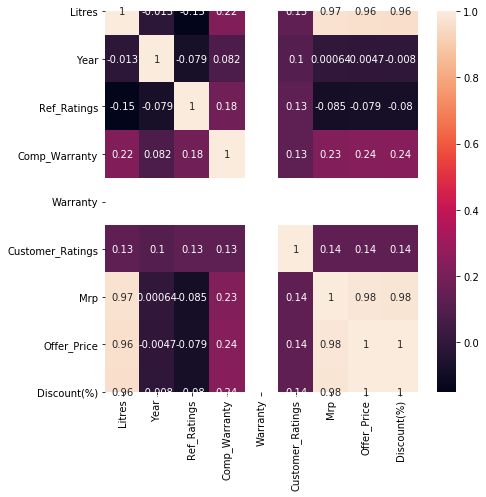

In [41]:
plt.figure(figsize=(7,7))
sns.heatmap(refg.corr(),annot=True)

***Here Mrp , Offer Price , Discount and litres are highly positively correlated***

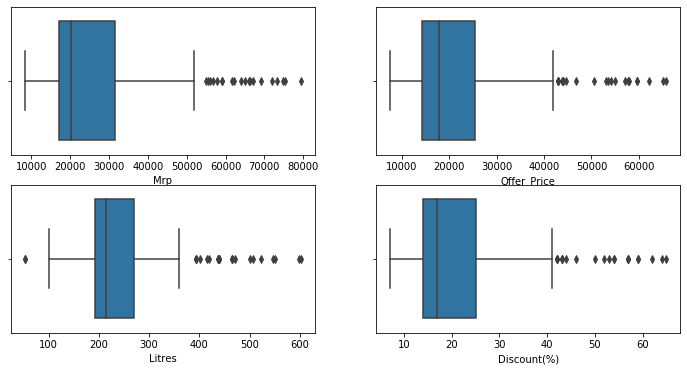

In [42]:
fig,ax=plt.subplots(2,2,figsize=(12,6))
sns.boxplot(x='Mrp',data=refg,ax=ax[0,0])
sns.boxplot(x='Offer_Price',data=refg,ax=ax[0,1])
sns.boxplot(x='Litres',data=refg,ax=ax[1,0])
sns.boxplot(x='Discount(%)',data=refg,ax=ax[1,1])

***Their are some outliers in Data***

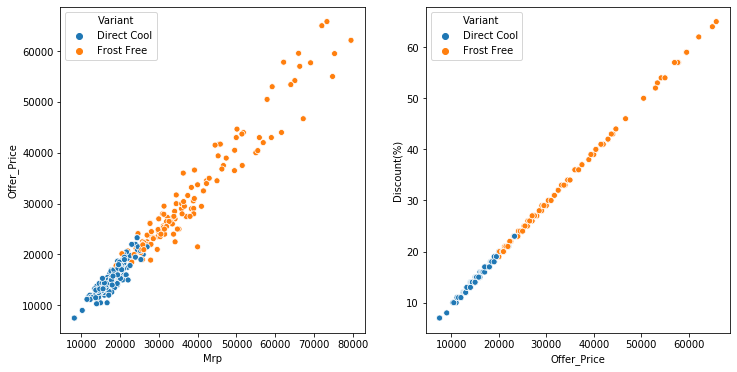

In [43]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot('Mrp','Offer_Price',data=refg,hue='Variant',ax=ax[0])
sns.scatterplot('Offer_Price','Discount(%)',data=refg,hue='Variant',ax=ax[1])

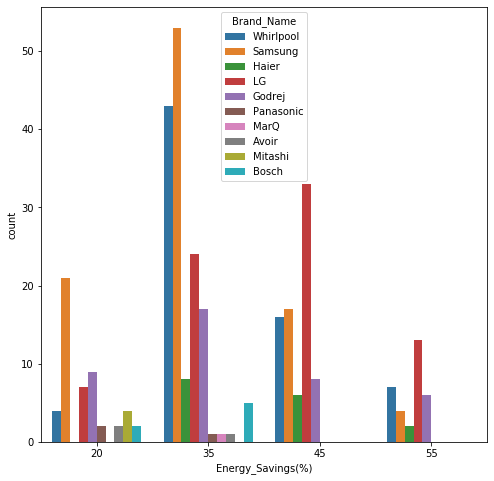

In [44]:
plt.figure(figsize=(8,8))
sns.countplot(refg['Energy_Savings(%)'],hue=refg['Brand_Name'])

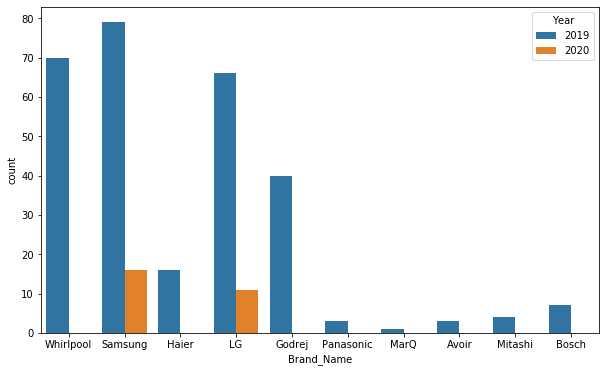

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(refg['Brand_Name'],hue=refg['Year'])

***In Overall Data the Lg and samsung are only having 2020 products and others are2019 products***